# 차원축소 Assignment2

## MNIST data에 적용을 해보기 (╹◡╹)

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [ ]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
mnist = io.loadmat('/content/drive/My Drive/Tobigs/week5_PCA/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

In [ ]:
# 데이터 정보!
# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [ ]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [ ]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [ ]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

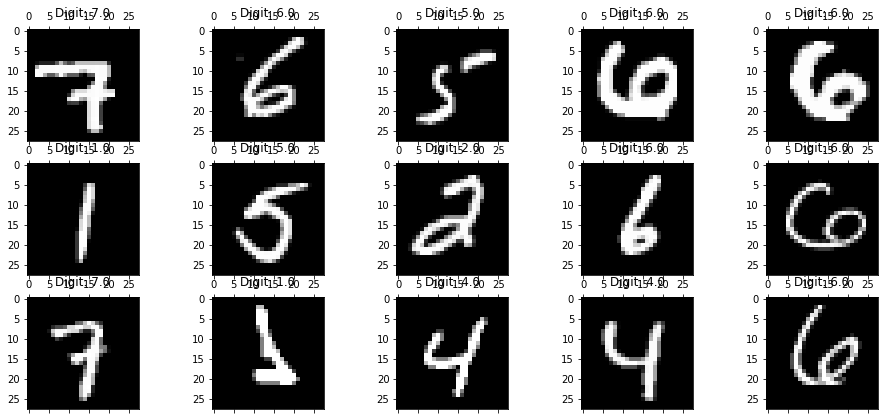

In [ ]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!
강의에서 배웠던 3가지 중 어떤 걸 고려하였는지요! 
scree plot같은거는 직접 그려봐도 좋겠죠 ㅎㅎㅎ

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

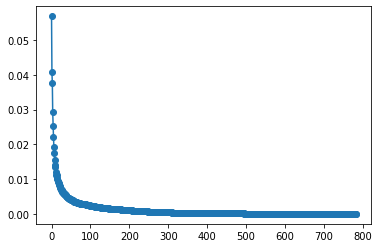

In [ ]:
from sklearn.decomposition import PCA

# PCA, 우선 n_components를 전체 변수의 개수로 넣고 scree plot을 그려보기로 한다.
pca = PCA(n_components=X_train.shape[1])
pca.fit_transform(X_train)
plt.plot(pca.explained_variance_ratio_, marker='o')

In [ ]:
# scree plot으로는 명확한 지점을 찾기 어려워 누적설명률을 구해 80% 이상인 지점을 구한다.
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_d = np.argmax(cumsum >= 0.8) + 1
num_d

148

In [ ]:
# 분산의 80% 이상을 설명하는 주성분 148개를 선택하여 차원을 축소한다.
pca = PCA(n_components=num_d)
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))  # test 데이터도 차원 축소 (이 때는 fit_transform이 아니라 transform, scaling 때와 같은 원리)
pca_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,-4.464373,10.597681,-9.030448,-3.600066,-0.646673,2.519321,-2.156759,8.092188,-3.005020,-3.924271,8.049943,-0.126698,-3.302270,2.084927,-1.674778,2.015805,1.054110,-0.361063,-1.697360,-2.971354,-3.791479,-0.799208,-3.761185,-1.256357,2.869867,-2.399037,1.821876,-0.272498,-2.209213,1.612649,-1.268849,-0.799222,-0.376468,-1.263756,-2.606367,-0.075101,-2.051849,-1.413763,1.340797,-0.133443,...,0.735223,-0.461858,0.899192,0.021649,-0.160060,0.820735,0.976423,-0.126616,1.089128,-0.155881,-1.004239,0.210332,0.644855,0.929859,-0.174689,-0.760738,0.326800,-0.120614,0.200413,0.124665,-0.208048,-1.239169,1.142071,-0.658161,0.233021,0.435378,0.938829,0.978104,-0.190682,-0.408972,-0.589090,-0.501921,0.917326,-0.175184,0.137658,0.209666,-0.973562,-0.996963,1.372232,0.104527
1,4.254762,1.435783,1.204336,-0.025039,-10.356028,-2.515324,-1.438678,4.501630,0.351925,-1.774744,-1.140508,0.561616,1.088114,-2.050489,-0.761153,-3.185468,-0.564723,-0.209130,0.395350,0.829723,-0.411755,-0.313171,0.338510,-0.633329,1.081056,-0.882680,2.000140,1.182574,1.654077,-1.985649,-0.341898,-1.114280,0.150180,0.699293,-0.729149,0.138585,-0.514774,-2.903994,-0.519247,-0.058825,...,-0.416550,-0.145699,0.016627,0.019197,0.763467,-0.559223,0.491653,-0.175894,0.808159,-0.816425,-0.346691,-0.814290,-0.500913,-0.475254,0.366754,-0.049157,-0.134973,0.595743,0.933364,0.514137,0.761616,-0.840030,0.387290,-0.076072,0.711381,0.229951,-0.210873,-0.085642,0.519480,-0.089182,0.328963,0.174832,-0.880398,-0.253685,0.603601,-0.183999,0.242562,-0.134743,-0.672261,0.256428
2,-6.017605,-3.670609,4.380070,0.480581,5.600687,0.594497,4.685274,-4.220004,-0.498085,-1.361010,-0.040349,3.357446,-1.253454,-3.285434,-1.659672,2.567615,-0.468570,1.058049,0.214867,-1.076983,-2.435939,-1.334954,-1.570691,-1.072178,2.170013,0.249120,-0.197293,-0.621441,0.805742,0.454120,1.477872,-0.646990,1.214259,-2.063255,1.171382,0.629258,-0.894294,1.424277,0.882927,0.169507,...,0.874017,0.284393,0.121463,0.014237,-0.755596,0.109490,-0.237804,-0.329444,0.202693,-0.854910,0.626248,-0.154852,-0.368906,-0.476050,-0.454072,-0.182920,0.364105,-0.771842,0.849717,-0.447234,-0.281498,0.327739,0.511857,-0.442851,-0.273984,0.932282,-0.365121,0.230871,0.184847,-0.321529,0.296918,0.789917,0.132868,-0.653879,-0.722991,0.281226,-0.097442,0.186084,0.442418,-0.688535
3,7.972485,-11.342785,-0.976523,0.792473,-0.773873,9.391894,4.669355,-0.899975,-5.115644,-0.298368,2.893465,-0.687614,-2.067857,7.495447,-0.062989,-1.692597,4.874555,-1.223881,-2.434049,1.132193,-0.054363,0.234607,3.240023,0.326746,2.441224,1.522378,1.033173,-1.721708,0.391762,4.666004,0.016993,-2.064394,-0.774854,-0.223505,-0.732579,1.156628,1.472038,1.311703,-2.993241,-2.162541,...,-1.670575,0.090663,0.473034,0.192650,0.717708,-0.255879,-0.506561,-1.153382,0.681749,1.567161,0.492261,-0.172408,-1.917843,-0.085207,0.358223,-0.761836,-0.734410,-0.342608,0.515485,0.448126,0.830187,0.535933,0.645831,-0.412285,-0.412382,-0.315334,0.034093,-1.286856,-0.108262,-1.022981,0.097416,-0.317029,-0.731380,0.333436,1.559808,-0.050832,0.180896,-0.866465,-1.910955,-0.221393
4,-1.770658,-2.354498,9.479495,4.012843,0.574934,-1.335414,1.668760,-0.468772,-2.504699,-1.814597,-0.195767,4.180831,-1.615425,0.036190,3.086856,-2.009317,-0.266280,1.607018,-0.656389,-1.080856,-1.155299,-0.888033,-0.471229,-1.082155,1.269816,-3.313664,0.488679,-0.148282,-1.817688,-1.330848,1.480030,-1.047150,2.421312,0.030511,0.307672,-2.132867,-1.238817,3.997159,2.641136,0.332829,...,0.546460,0.248581,0.133459,0.557070,-1.088894,-0.736915,0.876337,-1.089667,-0.818982,0.538023,0.535911,0.013398,0.222567,1.125316,-0.668072,0.512926,0.856473,-0.509355,0.246683,0.002293,0.150945,0.705228,-1.169625,-0.269665,-1.450442,1.071266,0.559625,0.56

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA도 마찬가지로 누적설명률을 구해 분산의 80%를 설명하는 주성분 개수를 구해 차원 축소해준다.
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, y_train)
cumsum = np.cumsum(lda.explained_variance_ratio_)
num_d = np.argmax(cumsum >= 0.8) + 1
num_d

5

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=num_d)
lda_X_train = pd.DataFrame(lda.fit_transform(X_train, y_train))
lda_X_test = pd.DataFrame(lda.transform(X_test))
lda_X_test.head()

,0,1,2,3,4
0,4.853307,-2.693505,-1.938492,-3.882705,-0.389080
1,-1.597411,-2.940327,0.122684,-1.367405,0.060319
2,0.381409,3.884553,-0.159369,0.903404,-1.955040
3,-0.486856,1.608485,-1.086438,-2.827326,2.151821
4,-1.719574,3.417627,0.675750,-2.016345,0.563816


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
import time

# SVM - 원본 데이터
svm = SVC(kernel ='linear')
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
y_pred = svm.predict(X_test)

print(f"Training time: {stop - start}s")
print(metrics.accuracy_score(y_test,y_pred))

Training time: 548.0145580768585s
0.9238571428571428


In [ ]:
# SVM - PCA 축소 데이터
svm = SVC(kernel ='linear')
start = time.time()
svm.fit(pca_X_train, y_train)
stop = time.time()
y_pred = svm.predict(pca_X_test)

print(f"Training time: {stop - start}s")
print(metrics.accuracy_score(y_test,y_pred))

Training time: 233.00093269348145s
0.9395714285714286


In [ ]:
# SVM - LDA 축소 데이터
svm = SVC(kernel ='linear')
start = time.time()
svm.fit(lda_X_train, y_train)
stop = time.time()
y_pred = svm.predict(lda_X_test)

print(f"Training time: {stop - start}s")
print(metrics.accuracy_score(y_test,y_pred))

Training time: 21.235848665237427s
0.8371428571428572


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest - 원본 데이터
rf = RandomForestClassifier(n_estimators=1000)
start = time.time()
rf.fit(X_train, y_train)
stop = time.time()
y_pred = rf.predict(X_test)

print(f"Training time: {stop - start}s")
print(metrics.accuracy_score(y_test,y_pred))

Training time: 334.2715766429901s
0.9707142857142858


In [ ]:
# RandomForest - PCA 축소 데이터
rf = RandomForestClassifier(n_estimators=1000)
start = time.time()
rf.fit(pca_X_train, y_train)
stop = time.time()
y_pred = rf.predict(pca_X_test)

print(f"Training time: {stop - start}s")
print(metrics.accuracy_score(y_test,y_pred))

Training time: 855.0318374633789s
0.9492142857142857


In [ ]:
# RandomForest - LDA 축소 데이터
rf = RandomForestClassifier(n_estimators=1000)
start = time.time()
rf.fit(lda_X_train, y_train)
stop = time.time()
y_pred = rf.predict(lda_X_test)

print(f"Training time: {stop - start}s")
print(metrics.accuracy_score(y_test,y_pred))

Training time: 148.4403555393219s
0.8474285714285714


###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

정확도를 비교해보니 전반적으로 SVM보다는 RandomForest가, LDA보다는 PCA가 높은 정확도를 보였다. RandomForest로 PCA한 데이터를 학습한 결과 0.94의 정확도를 보였다.

training 시간은 colab에서 중간에 GPU 연결이 끊기고 중간에 로컬로 돌아가서 원본데이터보다 오래 걸린 것 같다. (동등한 환경에서 돌릴 경우 시간이 짧아질 것) 데이터 크기가 약 5배 넘게 차이나는 데에 비해 정확도는 0.0215밖에 차이 나지 않으므로 가장 좋은 결과를 보였다고 판단한다.

## 가장 높은 test accuracy가 나오신 분께 이모티콘 선물 드릴게요 ٩(๑❛ᴗ❛๑)۶